# Group Activity : Report on Data Exploration Techniques


**Group Name:** Halimaw Magbeg


**Group Leader** : Aliza May Bataluna


**Group Members:**


<ul style="margin-top: 0; margin-bottom: 0;">
  <li>Cielo Alegam</li>
  <li>Kerch Cabo</li>
  <li>Angela Madaya</li>
  <li>Gieb Mier</li>
</ul>


## Introduction


In this group activity, Group Halimaw Magbeg investigates the connection between happiness levels and alcohol consumption patterns using a dataset sourced from Kaggle. The dataset encompasses a variety of both numerical and categorical variables, reflecting alcohol use across different nations and its potential association with happiness.


The aim of our analysis is to carry out a thorough examination of the dataset's statistical properties. We will compute key metrics, explore trends, and assess potential correlations between the variables.


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load the dataset
df = pd.read_csv('HappinessAlcoholConsumption.csv')

print(df.head())

       Country          Region Hemisphere  HappinessScore  HDI  GDP_PerCapita  \
0      Denmark  Western Europe      north           7.526  928         53.579   
1  Switzerland  Western Europe      north           7.509  943         79.866   
2      Iceland  Western Europe      north           7.501  933         60.530   
3       Norway  Western Europe      north           7.498  951         70.890   
4      Finland  Western Europe      north           7.413  918         43.433   

   Beer_PerCapita  Spirit_PerCapita  Wine_PerCapita  
0             224                81             278  
1             185               100             280  
2             233                61              78  
3             169                71             129  
4             263               133              97  


We first load the "Happiness and Alcohol Consumption" dataset with pd.read_csv() and then display the first few rows using df.head(), providing an overview of the data structure and key variables.


# Cleaning the Data


Checking for missing values with df.isnull().sum() shows that there are no missing values in any of the columns, ensuring the dataset is complete and ready for analysis.


In [3]:
# Missing Values

print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
Country             0
Region              0
Hemisphere          0
HappinessScore      0
HDI                 0
GDP_PerCapita       0
Beer_PerCapita      0
Spirit_PerCapita    0
Wine_PerCapita      0
dtype: int64


In [4]:
# Cleaning the data frame

df = df.dropna().drop_duplicates()

In [5]:
# Check for data types and structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           122 non-null    object 
 1   Region            122 non-null    object 
 2   Hemisphere        122 non-null    object 
 3   HappinessScore    122 non-null    float64
 4   HDI               122 non-null    int64  
 5   GDP_PerCapita     122 non-null    float64
 6   Beer_PerCapita    122 non-null    int64  
 7   Spirit_PerCapita  122 non-null    int64  
 8   Wine_PerCapita    122 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


Using df.info(), we find that the dataset has 122 entries and 9 columns. It includes object types for categorical variables and float64 or int64 for numerical variables, providing an overview of data types and memory usage.


# Basic Descriptive Statistics


We analyze basic descriptive statistics for key columns: Happiness Score, HDI, GDP Per Capita, and alcohol consumption metrics.


In [6]:
columns = ['HappinessScore', 'HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']

In [21]:
# Loop through each column and calculate the statistics
for column in columns:
    print(f"Statistics for '{column}':")

    data = df[column]
    
    #Mean, Median, Mode
    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
    
    print(f"  Mean: {mean_val}")
    print(f"  Median: {median_val}")
    print(f"  Mode: {mode_val}")

    # Standard Deviation and Variance
    std_val = data.std()
    var_val = data.var()
    
    print(f"  Standard Deviation: {std_val}")
    print(f"  Variance: {var_val}")

    # Min, Max, and Range
    min_val = data.min()
    max_val = data.max()
    range_val = max_val - min_val
    
    print(f"  Min: {min_val}")
    print(f"  Max: {max_val}")
    print(f"  Range: {range_val}")

    # 25th, 50th, 75th Percentiles
    percentiles = np.percentile(data.dropna(), [25, 50, 75])
    
    print(f"  25th Percentile: {percentiles[0]}")
    print(f"  50th Percentile (Median): {percentiles[1]}")
    print(f"  75th Percentile: {percentiles[2]}")

Statistics for 'HappinessScore':
  Mean: 5.524827868852459
  Median: 5.542
  Mode: 5.835
  Standard Deviation: 1.148736054907744
  Variance: 1.3195945238450077
  Min: 3.069
  Max: 7.526
  Range: 4.457
  25th Percentile: 4.52825
  50th Percentile (Median): 5.542
  75th Percentile: 6.477

--------------------------------------------------
Statistics for 'HDI':
  Mean: 740.8770491803278
  Median: 757.5
  Mode: 748
  Standard Deviation: 149.84612371102799
  Variance: 22453.860791220704
  Min: 351
  Max: 951
  Range: 600
  25th Percentile: 663.75
  50th Percentile (Median): 757.5
  75th Percentile: 861.5

--------------------------------------------------
Statistics for 'GDP_PerCapita':
  Mean: 91.48283606557376
  Median: 12.016
  Mode: 1.029
  Standard Deviation: 209.5773133103142
  Variance: 43922.6502543696
  Min: 1.029
  Max: 953.0
  Range: 951.971
  25th Percentile: 4.13425
  50th Percentile (Median): 12.016
  75th Percentile: 41.989999999999995

---------------------------------------

In [8]:
df.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,91.482836,137.565574,96.598361,66.598361
std,1.148736,149.846124,209.577313,104.817353,81.435028,88.121503
min,3.069000,351.000000,1.029000,1.000000,1.000000,1.000000
25%,4.528250,663.750000,4.134250,38.250000,25.500000,5.000000
50%,5.542000,757.500000,12.016000,125.500000,82.500000,16.000000
75%,6.477000,861.500000,41.990000,224.750000,142.500000,112.750000
max,7.526000,951.000000,953.000000,376.000000,373.000000,370.000000


# Visualization


### **HEATMAP**


The correlation heatmap illustrates the relationships between various factors related to happiness, specifically focusing on the Happiness Score, HDI (Human Development Index), GDP Per Capita, and alcohol consumption levels (beer, spirits, and wine).


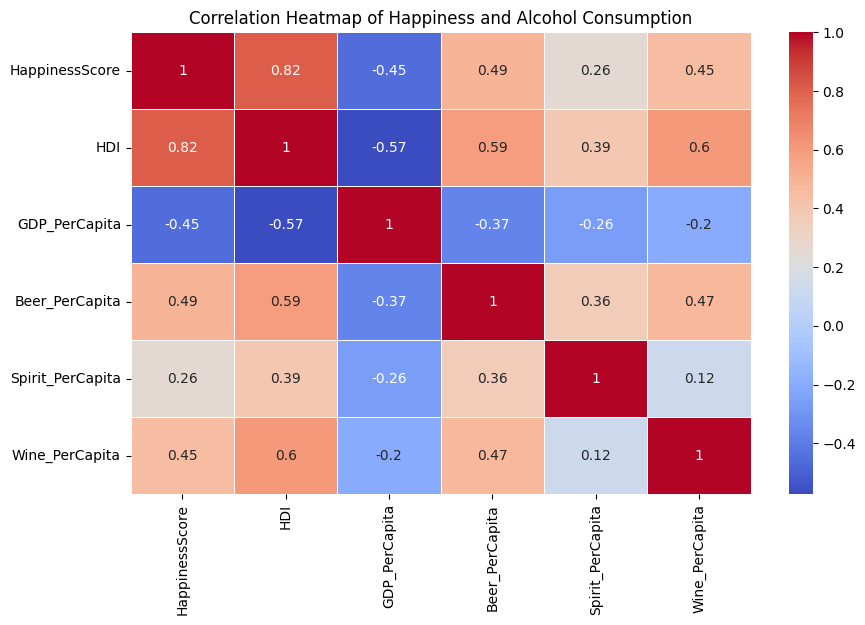

In [9]:
columns = ['HappinessScore', 'HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']

# Extract the relevant columns
df_selected = df[columns]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap of Happiness and Alcohol Consumption')
plt.show()

**Interpretation:**

-   Happiness Score and GDP Per Capita:
    The correlation is positive but weaker than with HDI, suggesting that while wealth contributes to happiness, the quality of life, as reflected in HDI, is also important.
-   Happiness Score and Alcohol Consumption:
    Moderate positive correlations are observed between happiness and all types of alcohol consumption, with beer showing the strongest correlation, possibly linked to social interactions.
-   Interrelations among Alcohol Types:
    Moderate correlations among beer, spirits, and wine indicate that high consumption of one type often correlates with high consumption of others, suggesting shared cultural factors.

Overall, the heatmap indicates that improving HDI and GDP may play significant roles in enhancing happiness, while alcohol consumption, particularly beer, contributes positively but is less central to the overall happiness score.


### **BOX PLOT**


The box plot effectively summarizes the variability and central tendencies of the metrics in the dataset. It enables quick comparisons and highlights outliers, prompting deeper exploration into the factors influencing happiness, economic performance, and alcohol consumption across different nations.


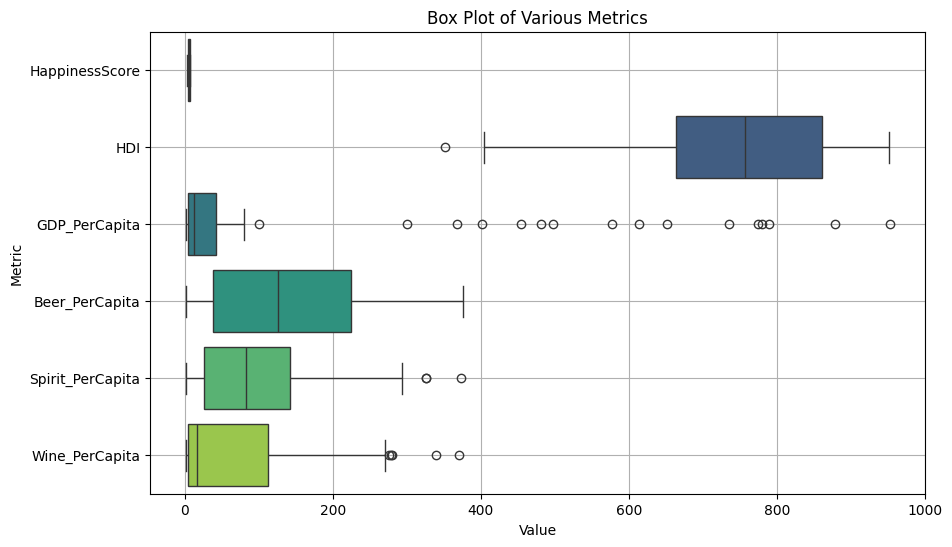

In [10]:
# Melt the dataframe to long format
df_melted = df[columns].melt(var_name='Metric', value_name='Value')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot with values on the x-axis and metrics on the y-axis
sns.boxplot(x='Value', y='Metric', data=df_melted, hue='Metric', palette='viridis', dodge=False)

# Set the title and labels
plt.title('Box Plot of Various Metrics')
plt.xlabel('Value')
plt.ylabel('Metric')

# Display the plot
plt.grid(True)
plt.show()


**Interpretation:**

-   The box plot shows a Happiness Score median of about 5.5, indicating moderate variability among countries, with most above the midpoint. The HDI median is around 740, suggesting high human development but notable disparities. The GDP per capita median of approximately 20,000 highlights significant economic inequalities, with outliers indicating extreme wealth.
-   The alcohol consumption data reveals a higher median for beer, indicating a widespread cultural preference, while spirits and wine show lower median consumption with fewer outliers, suggesting limited cultural integration.
-   Significant outliers in GDP and alcohol consumption highlight extreme cases, particularly among wealthier nations.
-   Potential correlations exist between beer consumption and higher happiness scores, suggesting social aspects of beer drinking may positively impact well-being.


### **GROUPED BAR CHART**


The graph effectively highlights how alcohol consumption patterns are influenced by regional cultural practices and economic conditions.


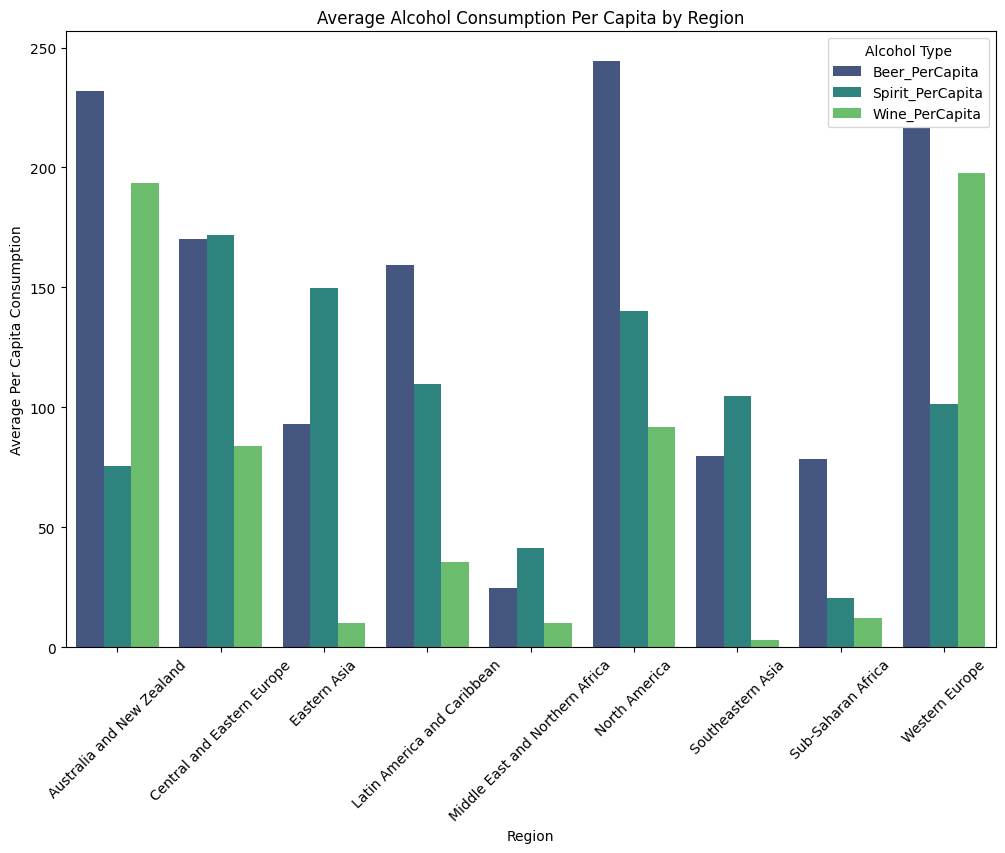

In [11]:
# Group by region and calculate the mean consumption per capita for each type
region_alcohol_consumption = df.groupby('Region')[['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']].mean().reset_index()

# Melt the dataframe to have a format suitable for seaborn
region_alcohol_consumption_melted = region_alcohol_consumption.melt(id_vars='Region', var_name='Alcohol_Type', value_name='PerCapita')

# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Create the bar plot using seaborn
sns.barplot(x='Region', y='PerCapita', hue='Alcohol_Type', data=region_alcohol_consumption_melted, palette='viridis')

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Average Alcohol Consumption Per Capita by Region')
plt.xlabel('Region')
plt.ylabel('Average Per Capita Consumption')

# Display the plot
plt.legend(title='Alcohol Type')
plt.show()

**Interpretation:**

-   The graph illustrates significant regional disparities in alcohol consumption, reflecting cultural, economic, and social factors. Western Europe shows the highest wine consumption, while North America and Central & Eastern Europe prefer beer and spirits, respectively. Regions like Africa and Asia exhibit lower averages across all types.
-   Consumption patterns highlight distinct regional preferences, with Western Europe favoring wine, while North America and Central & Eastern Europe prefer beer and spirits, respectively.


## **BAR CHART**


The bar chart presents the average per capita consumption of beer, spirits, and wine, revealing distinct preferences across different alcohol types.


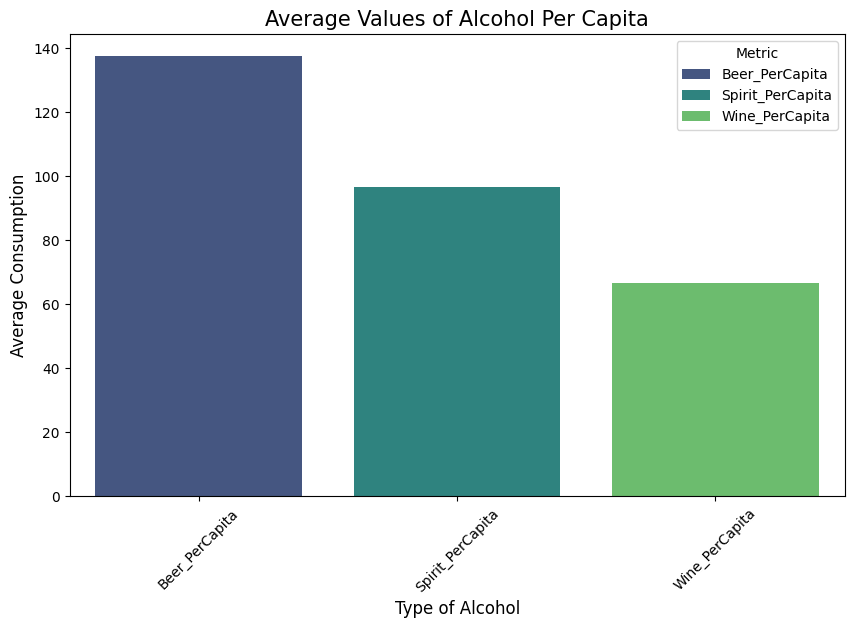

In [12]:
columns = ['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']

mean_values = df[columns].mean().reset_index()
mean_values.columns = ['Metric', 'Average Value']

plt.figure(figsize=(10, 6))

sns.barplot(x='Metric', y='Average Value', hue='Metric', data=mean_values, palette='viridis', legend=True)

plt.title('Average Values of Alcohol Per Capita', fontsize=15)
plt.xlabel('Type of Alcohol', fontsize=12)
plt.ylabel('Average Consumption', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.show()

**Interpretation:**

-   Beer: Shows the highest average consumption, indicating its popularity among consumers.
-   Spirits: Reflects moderate consumption levels, suggesting a notable but lesser preference compared to beer.
-   Wine: Exhibits the lowest average consumption, highlighting its relatively niche appeal.

These trends underscore varying cultural preferences for alcohol types, which can inform public health initiatives and market strategies tailored to consumer behavior.


## **HORIZONTAL BAR CHART**


The chart highlights the top 10 countries with the highest total alcohol consumption per capita, measured in liters.


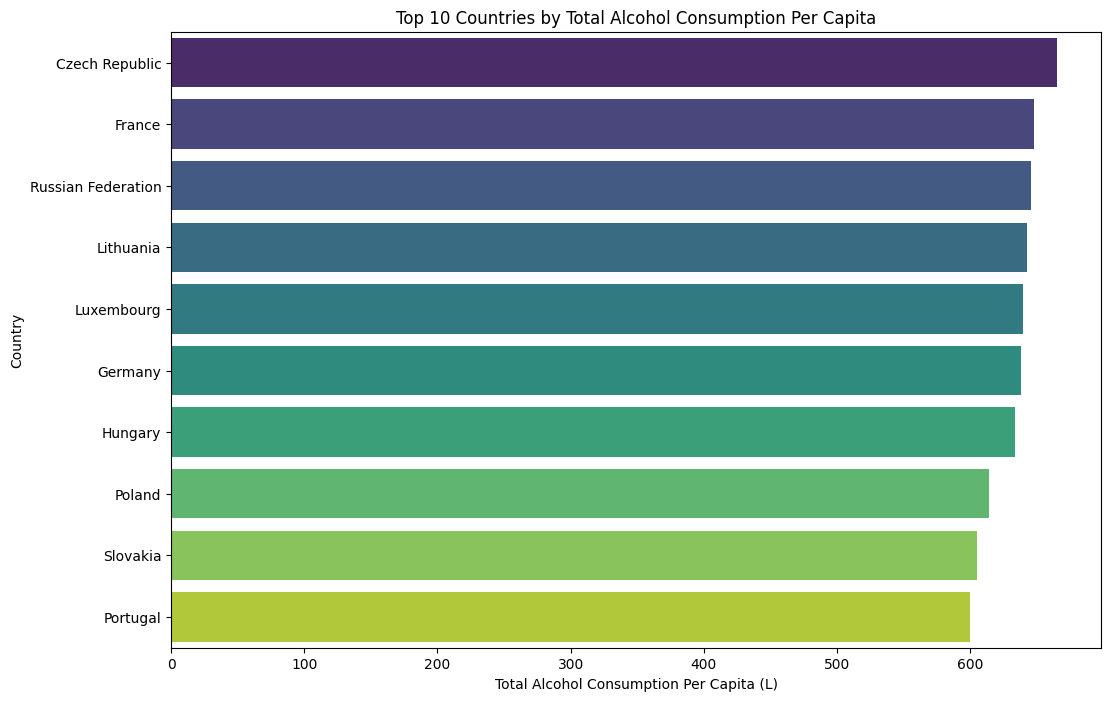

In [13]:
df['Total_Alcohol_PerCapita'] = df[['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']].sum(axis=1)

df = df.sort_values(by='Total_Alcohol_PerCapita', ascending=False)

top_10_countries = df.head(10)

plt.figure(figsize=(12, 8))

sns.barplot(x='Total_Alcohol_PerCapita', y='Country', hue='Country', data=top_10_countries, palette='viridis', dodge=False, legend=False)

plt.title('Top 10 Countries by Total Alcohol Consumption Per Capita')
plt.xlabel('Total Alcohol Consumption Per Capita (L)')
plt.ylabel('Country')

plt.show()

**Interpretation:**

-   Czech Republic: Leads in total alcohol consumption per capita, highlighting a strong cultural acceptance and integration of alcohol in daily life.
-   Russia: Following closely, indicating a significant cultural inclination towards alcohol, particularly spirits like vodka, which are embedded in social traditions.
-   France: Ranks third, reflecting its renowned wine culture, where alcohol consumption is often associated with meals and social gatherings.
-   Germany: High consumption levels, influenced by its beer culture and festivals like Oktoberfest, which celebrate communal drinking.
-   Lithuania, Luxembourg, Hungary, Slovakia, Poland, and Portugal: These countries show moderate to high alcohol consumption, suggesting a robust cultural presence of alcohol that may impact public health and social dynamics.


### **CHLOROPLETH MAP**


This map visualizes the average alcohol consumption per capita by country, where each country is colored according to the level of alcohol consumption.


In [14]:
# Calculate the average alcohol consumption per capita by summing Beer, Spirit, and Wine columns
df['Avg_Alcohol_PerCapita'] = df[['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']].mean(axis=1)

# Plotting the geomap using Plotly Express
fig = px.choropleth(df, 
                    locations='Country',  # Make sure you have a 'Country' column with country names
                    locationmode='country names', 
                    color='Avg_Alcohol_PerCapita',
                    hover_name='Country',  # This shows the country name when hovering
                    color_continuous_scale='Blues',
                    labels={'Avg_Alcohol_PerCapita': 'Average Alcohol Consumption (L)'},
                    title='Average Alcohol Consumption Per Capita by Country')

# Show the plot
fig.show()


### **PAIR PLOT**


The pair plot effectively illustrates how happiness, economic factors, and alcohol consumption interrelate.


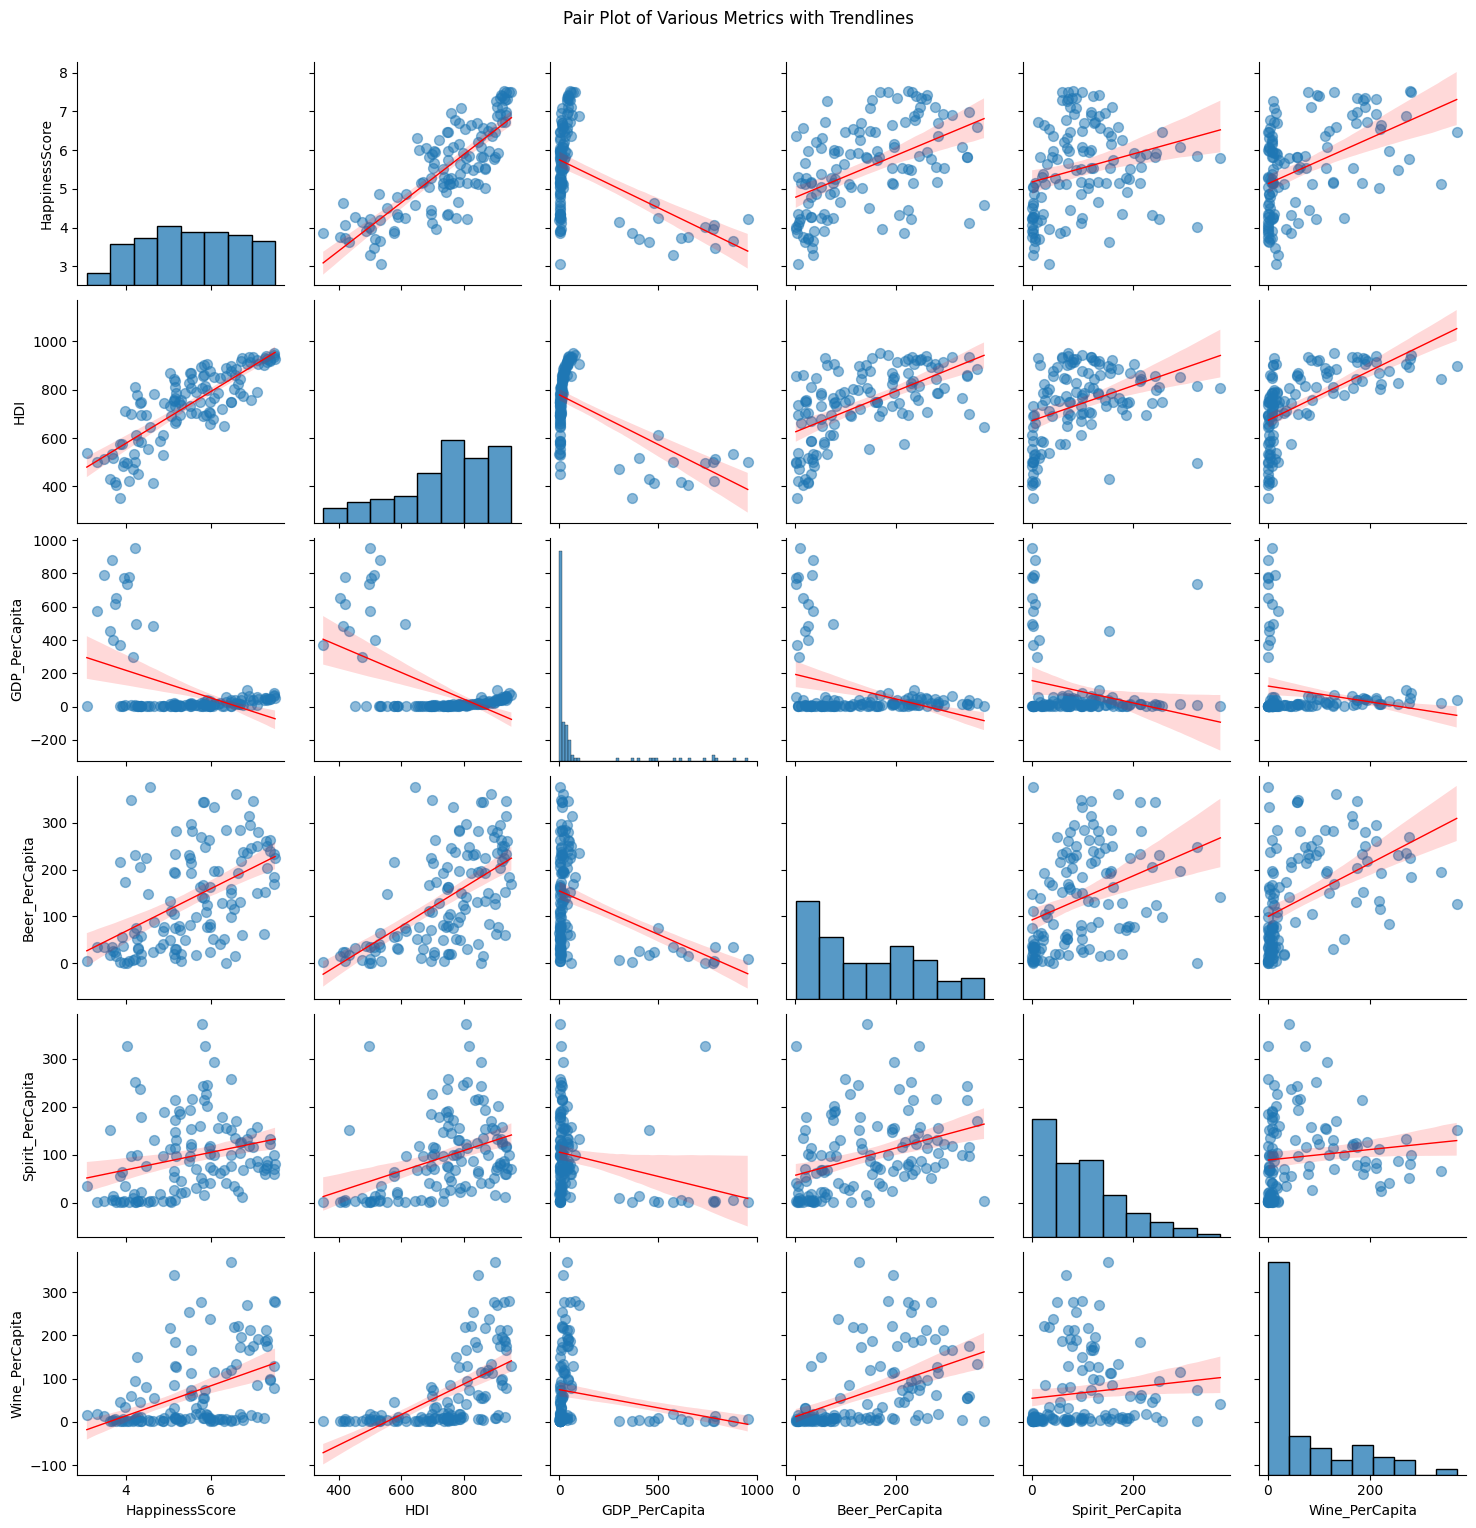

In [15]:
columns = ['HappinessScore', 'HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']

# Create the pair plot with trendlines and adjusted transparency
g = sns.pairplot(df[columns], kind='reg', plot_kws={
    'scatter_kws': {'s': 50, 'alpha': 0.5},  # Adjust the transparency of data points
    'line_kws': {'color': 'red', 'linewidth': 1}  # Customize the appearance of trendlines
})

# Set the title
plt.suptitle('Pair Plot of Various Metrics with Trendlines', y=1.02)

# Display the plot
plt.show()

**Interpretation:**

-   The graph indicates that improving HDI and economic conditions can significantly enhance happiness levels. Meanwhile, the relationship between alcohol consumption and happiness is influenced by cultural factors, indicating that simply increasing consumption may not lead to increased well-being.


## **SCATTER PLOT**


#### HDI vs HAPPINESS SCORE


The scatter plot visualizes the relationship between Human Development Index (HDI) and Happiness Score, segmented by region using different colors.


<Figure size 1000x600 with 0 Axes>

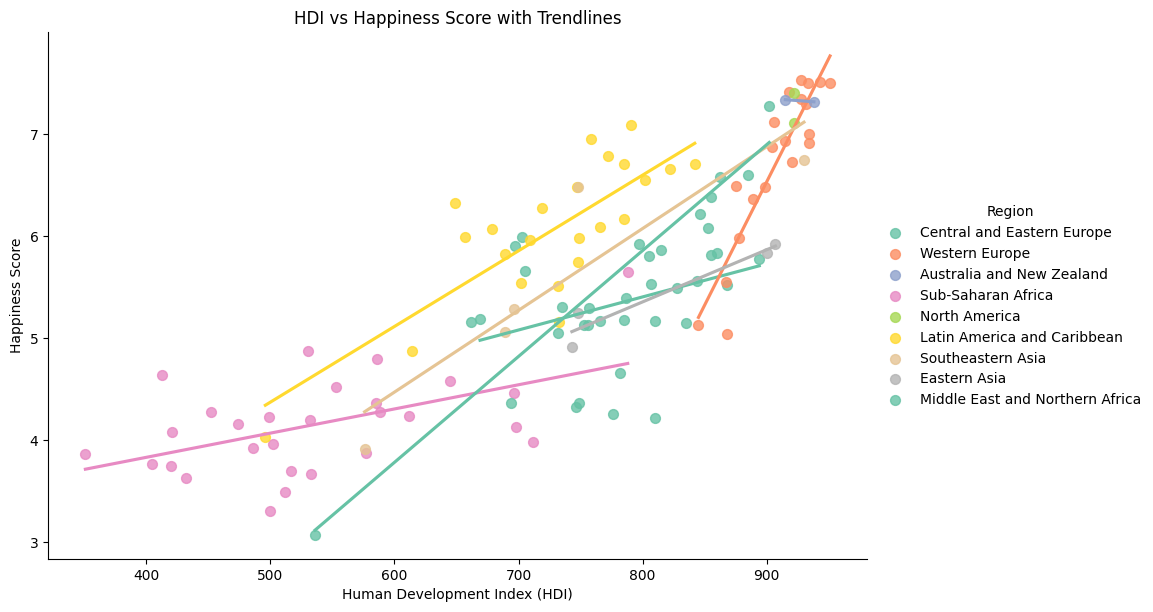

In [16]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot with regression lines using lmplot
sns.lmplot(x='HDI', y='HappinessScore', hue='Region', data=df, 
           palette='Set2', height=6, aspect=1.5, scatter_kws={'s': 50}, ci=None)

# Set the title and labels
plt.title('HDI vs Happiness Score with Trendlines')
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Happiness Score')

# Display the plot
plt.show()


**Interpretation:**

-   The graph effectively illustrates that while there is a general trend of increased happiness with higher HDI, regional differences suggest a complex interplay of various factors influencing happiness. This highlights the need for targeted policies that consider local contexts and additional determinants of happiness beyond economic and developmental indicators.


#### HDI vs AVERAGE ALCOHOL CONSUMPTION PER CAPITA


This scatter plot visualizes the relationship between alcohol consumption and human development across different regions.


<Figure size 1000x600 with 0 Axes>

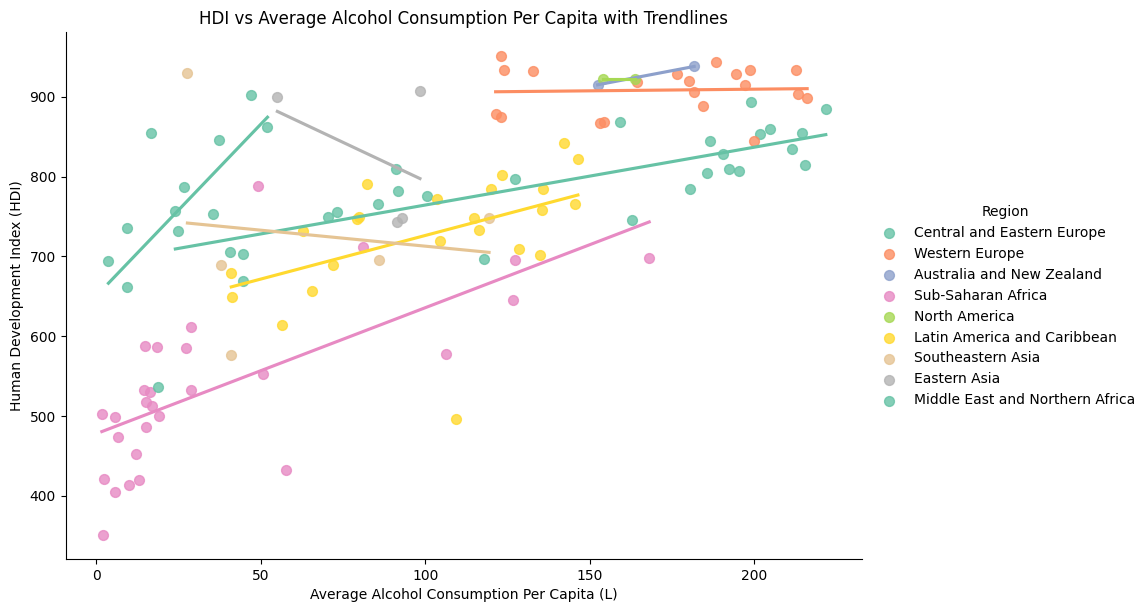

In [17]:
df['Avg_Alcohol_PerCapita'] = df[['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']].mean(axis=1)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot with regression lines using lmplot
sns.lmplot(x='Avg_Alcohol_PerCapita', y='HDI', hue='Region', data=df, 
           palette='Set2', height=6, aspect=1.5, scatter_kws={'s': 50}, ci=None)

# Set the title and labels
plt.title('HDI vs Average Alcohol Consumption Per Capita with Trendlines')
plt.xlabel('Average Alcohol Consumption Per Capita (L)')
plt.ylabel('Human Development Index (HDI)')

# Display the plot
plt.show()


**Interpretation:**

-   The plot likely reveals a positive correlation between Average Alcohol Consumption Per Capita and HDI. This suggests that, on average, countries with higher alcohol consumption also tend to have higher HDI scores, indicating better overall development and quality of life.
-   Western European countries tend to cluster in the high HDI and high average alcohol consumption area, reflecting cultural acceptance and regulation of alcohol linked to higher socio-economic status. In contrast, Sub-Saharan Africa shows a cluster of lower HDI and alcohol consumption, indicating socio-economic challenges that affect both development and drinking patterns.
-   There is a positive correlation between average alcohol consumption per capita and Human Development Index (HDI) across most regions, indicating that higher alcohol consumption often coincides with higher HDI.


#### HAPPINESS SCORE vs ALCOHOL CONSUMPTION


This scatter plot effectively visualizes the complex relationship between average alcohol consumption and happiness across different countries.


<Figure size 1000x600 with 0 Axes>

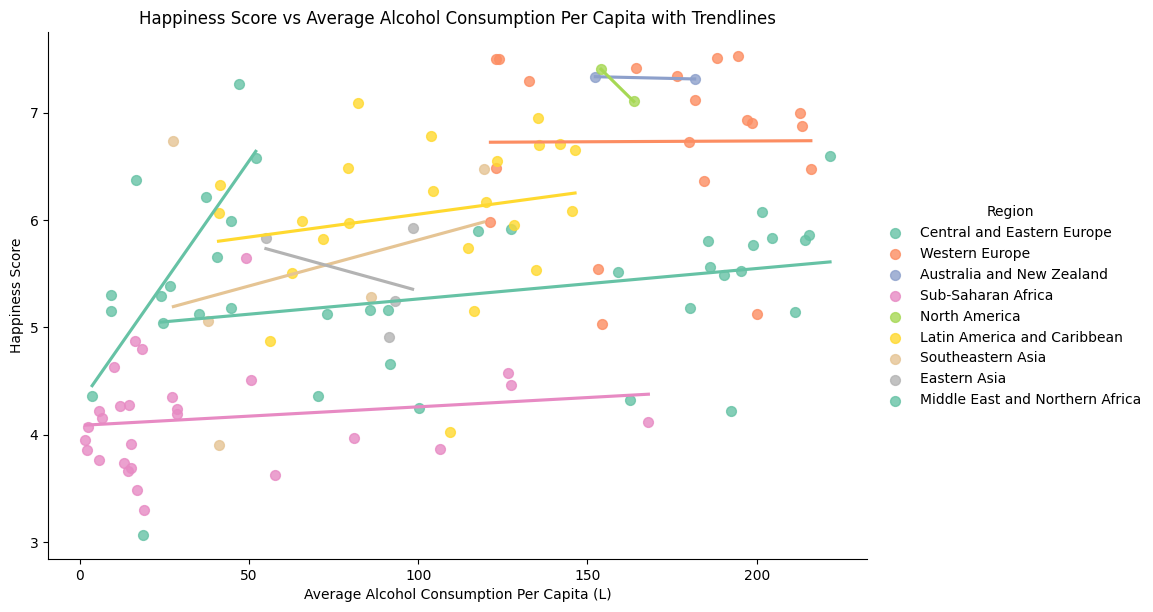

In [18]:
# Calculate total alcohol consumption per capita for each country
df['Avg_Alcohol_PerCapita'] = df[['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']].mean(axis=1)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot with regression lines using lmplot
sns.lmplot(x='Avg_Alcohol_PerCapita', y='HappinessScore', hue='Region', data=df, 
           palette='Set2', height=6, aspect=1.5, scatter_kws={'s': 50}, ci=None)

# Set the title and labels
plt.title('Happiness Score vs Average Alcohol Consumption Per Capita with Trendlines')
plt.xlabel('Average Alcohol Consumption Per Capita (L)')
plt.ylabel('Happiness Score')

# Display the plot
plt.show()


**Interpretation:**

-   There appears to be a positive correlation between average alcohol consumption and happiness scores. As average alcohol consumption increases, happiness scores tend to rise, suggesting that higher alcohol consumption may be associated with greater levels of reported happiness in certain contexts.
-   The relationship between alcohol consumption and happiness scores varies significantly across different regions. While some regions show a positive correlation, others show little to no correlation or even a negative correlation.


## Conclusion


The analysis of the "Happiness and Alcohol Consumption" dataset revealed several insights into the relationships between happiness levels and alcohol consumption patterns across various nations.

**Key findings include:**

-   **Correlations:** A moderate positive correlation exists between happiness scores and GDP per capita and HDI, emphasizing the importance of economic factors in influencing happiness. Moderate correlations between happiness and beer, spirits, and wine suggest a nuanced relationship between alcohol consumption and happiness.
-   **Regional Patterns**: The box plot and bar chart showcase the variability in metrics and highlight significant differences in alcohol consumption across regions, suggesting that cultural and economic factors heavily influence drinking habits.
-   **Cultural Influence:** The cultural context appears to shape not just consumption patterns but also overall happiness levels, reflecting the complex interplay between economic indicators, societal norms, and personal well-being.

Overall, the insights gleaned from this dataset could serve as a basis for further studies and policy discussions aimed at improving happiness and well-being through both economic development and cultural understanding.
